<a href="https://colab.research.google.com/github/james-caldwell1981/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment_Caldwell_James_TL_Hadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df_diagn = df['diagnosis']
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [98]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [99]:
df = df.drop('diagnosis', axis=1)
df.head()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
0    842302        17.99  ...                  0.11890          NaN
1    842517        20.57  ...                  0.08902          NaN
2  84300903        19.69  ...                  0.08758          NaN
3  84348301        11.42  ...                  0.17300          NaN
4  84358402        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [100]:
print(df['Unnamed: 32'].min())
print(df['Unnamed: 32'].max())

nan
nan


In [101]:
df['Unnamed: 32'].sum()

0.0

In [102]:
df.drop('Unnamed: 32', axis=1, inplace=True)

In [103]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [104]:
df.mean()

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [105]:
df.std()

id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst                 5.693570e+02


In [106]:
temp_cols1 = df.columns[1:7]
temp_cols2 = df.columns[8:]

In [107]:
cols = temp_cols1.append(temp_cols2)

In [108]:
data_df = df[cols]

In [109]:
scaler = StandardScaler()

In [110]:
data = scaler.fit_transform(data_df)

In [111]:
data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [112]:
data.shape

(569, 29)

In [113]:
data_cols = ['PC'+str(i) for i in range(1,data.shape[1]+1,1)]

In [114]:
df_proc = pd.DataFrame(data)

In [115]:
df_proc.columns = data_cols

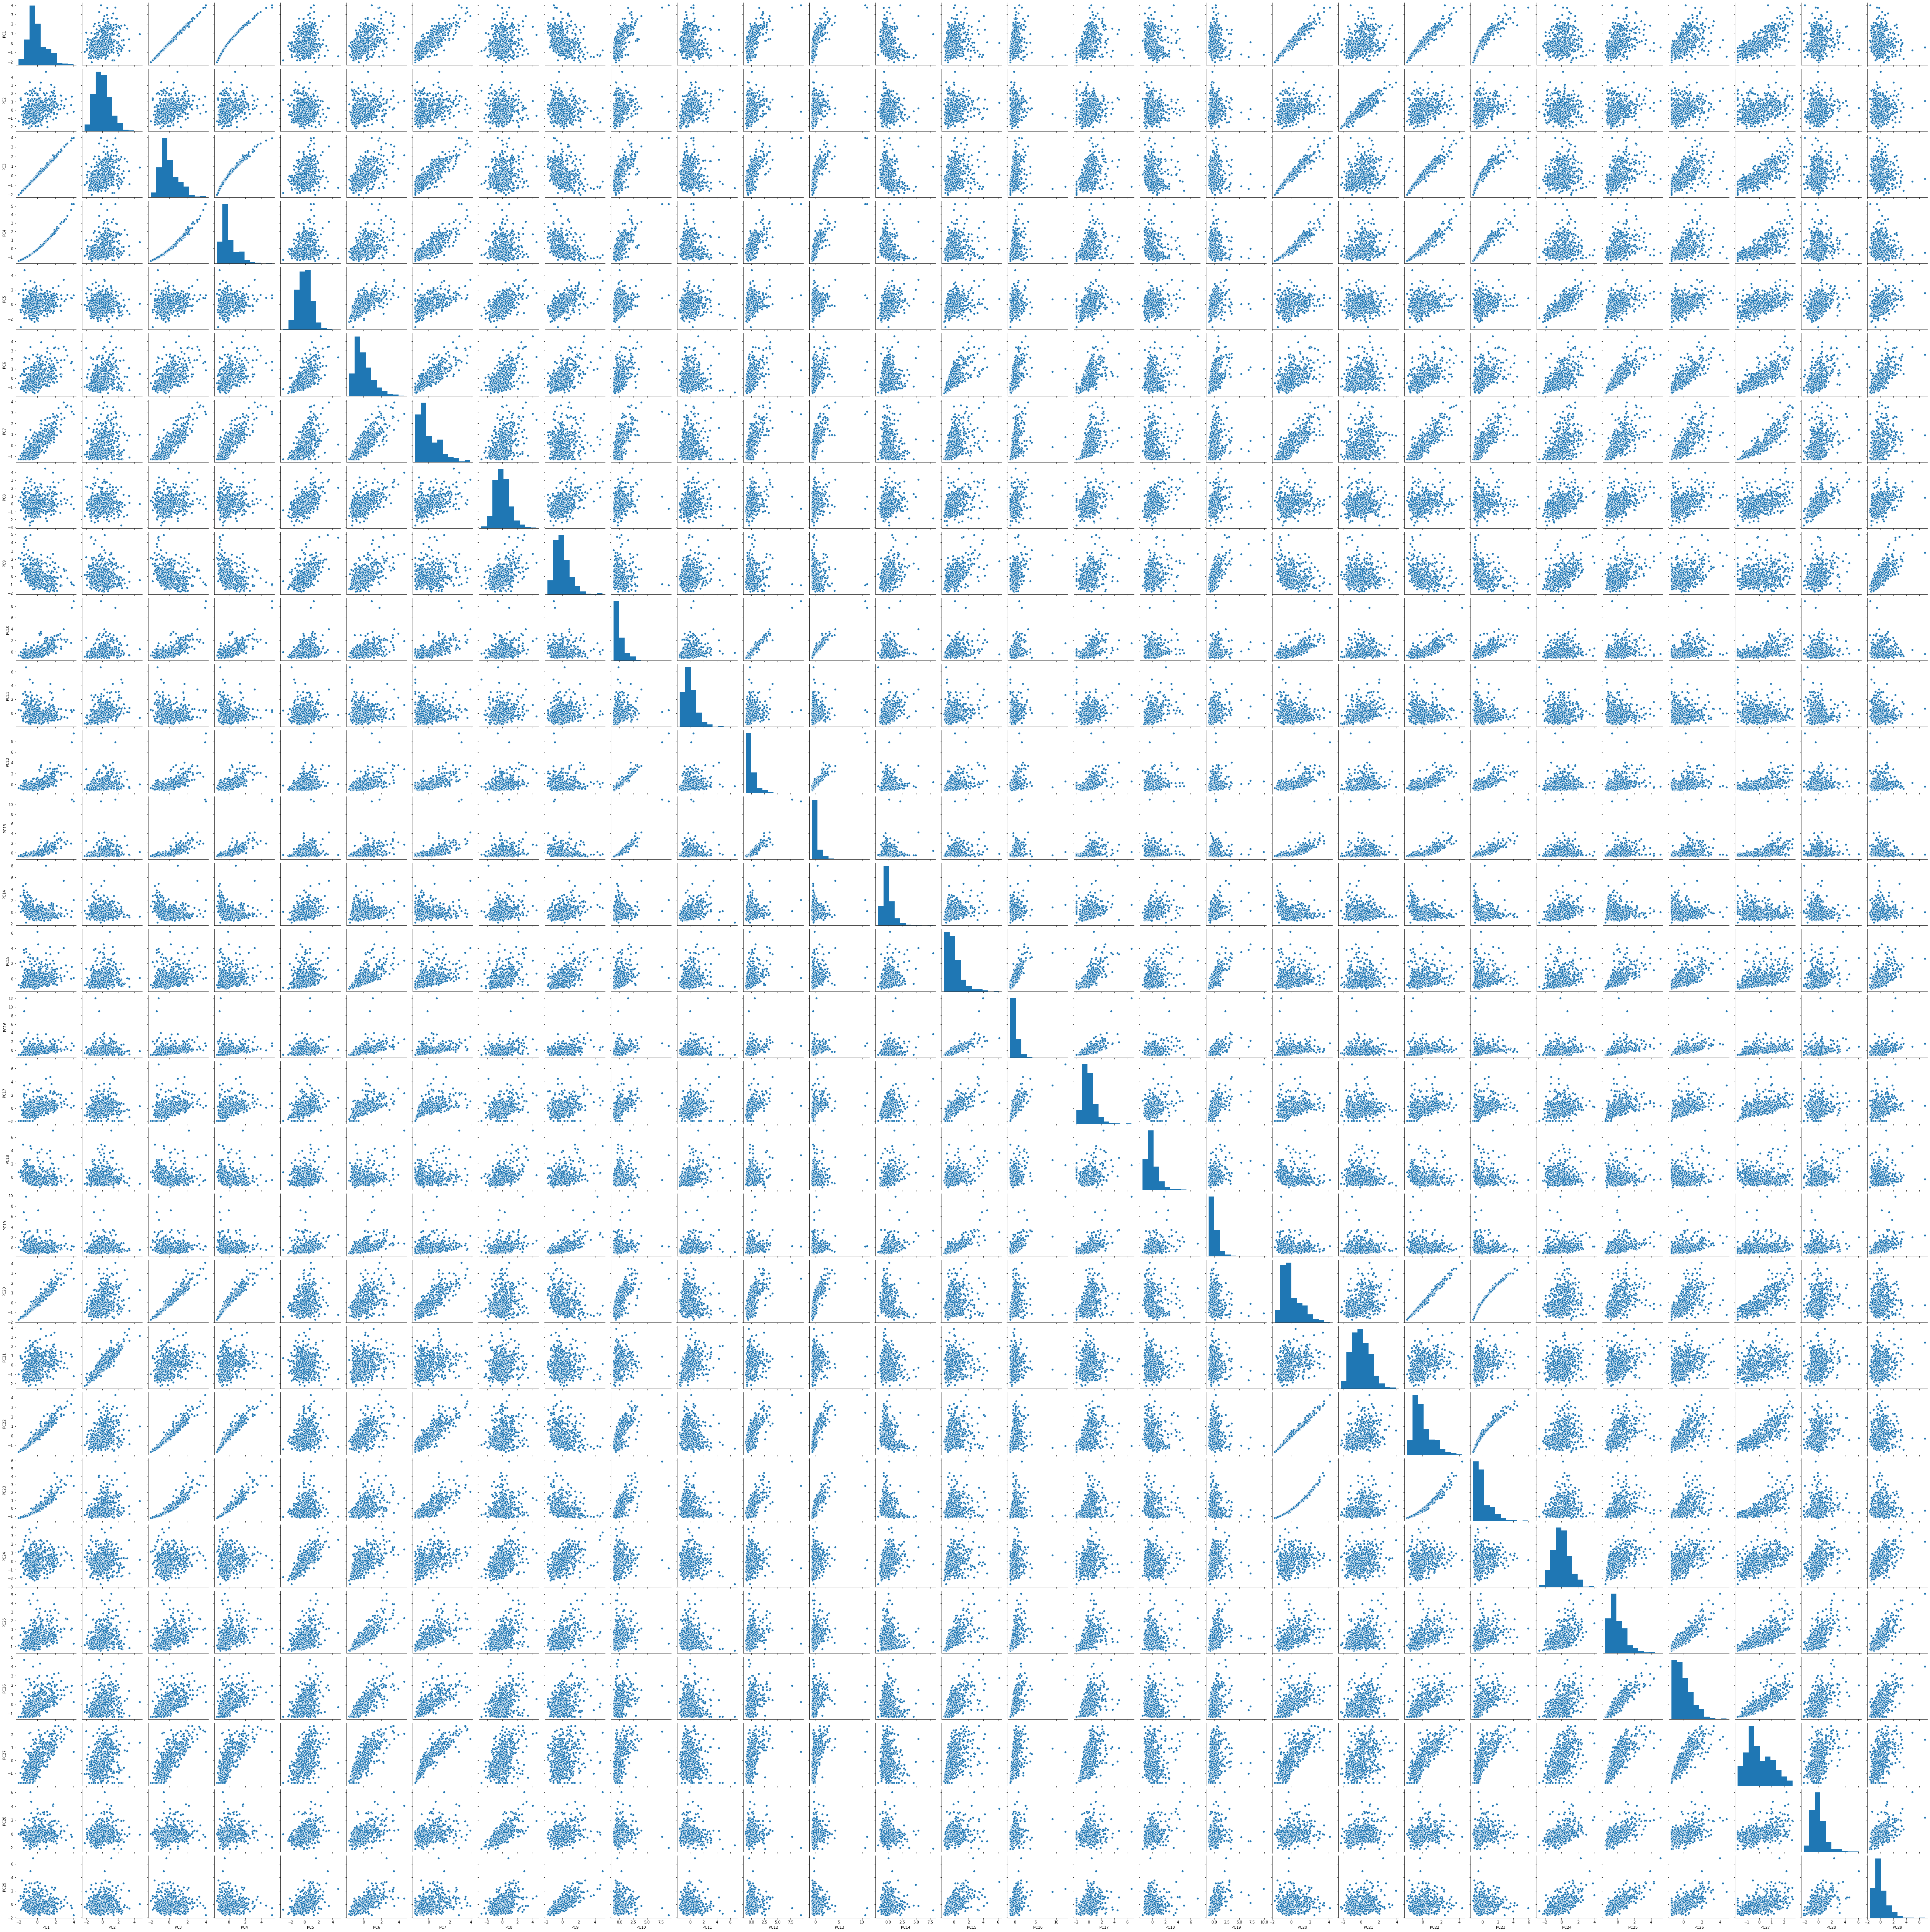

In [116]:
import seaborn as sns

sns.pairplot(df_proc)

In [117]:
kmeans = KMeans(n_clusters=2)

In [118]:
k_fit = kmeans.fit_transform(df_proc)

In [119]:
labels = kmeans.labels_

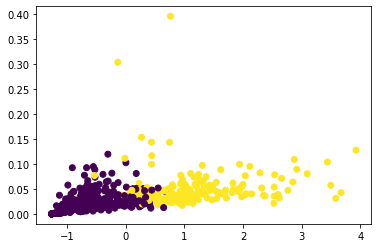

In [120]:
plt.scatter(x=df_proc['PC7'], y=df['concavity_se'], c=labels)

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [121]:
df_diagn.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [122]:
type(df_diagn)

pandas.core.series.Series

In [123]:
df_labels = pd.DataFrame(labels)

In [124]:
df_labels.head()

0
0  1
1  1
2  1
3  1
4  1

In [125]:
df_diagn.replace(to_replace=['M','B'], value=[1,0], inplace=True)

In [126]:
df_diagn.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [127]:
df_labels.columns = ['Prediction']
df_labels['Diagnosis'] = df_diagn.values

In [128]:
df_labels['Results'] = np.where(df_labels['Diagnosis']==df_labels['Prediction'], 1, 0)

In [129]:
df_labels.head()

Prediction  Diagnosis  Results
0           1          1        1
1           1          1        1
2           1          1        1
3           1          1        1
4           1          1        1

In [130]:
df_labels['Results'].value_counts()

1    522
0     47
Name: Results, dtype: int64

In [131]:
correct = df_labels['Results'].value_counts()[1]
incorrect = df_labels['Results'].value_counts()[0]

In [132]:
print('Correct Predictions: ', correct)
print('Incorrect Predictions: ', incorrect)
print('Prediction Accuracy: ', round(correct/(incorrect+correct)*100), '%')

Correct Predictions:  522
Incorrect Predictions:  47
Prediction Accuracy:  92.0 %


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [133]:
[df[i].mean() for i in df.columns]

[30371831.432337433,
 14.127291739894563,
 19.28964850615117,
 91.96903339191566,
 654.8891036906857,
 0.096360281195079,
 0.10434098418277686,
 0.08879931581722322,
 0.048919145869947236,
 0.181161862917399,
 0.06279760984182776,
 0.4051720562390161,
 1.2168534270650269,
 2.8660592267135288,
 40.33707908611603,
 0.007040978910369071,
 0.025478138840070306,
 0.03189371634446394,
 0.011796137082601056,
 0.020542298769771532,
 0.0037949038664323374,
 16.269189806678394,
 25.677223198594014,
 107.2612126537786,
 880.5831282952545,
 0.13236859402460469,
 0.25426504393673144,
 0.27218848330404205,
 0.11460622319859404,
 0.29007557117750454,
 0.08394581722319855]

In [134]:
print(df['id'].nunique())
print(len(df['id']))

569
569


In [135]:
cols1 = df.columns[1:3]
cols2 =df.columns[4:]
print(cols1)
print(cols2)

Index(['radius_mean', 'texture_mean'], dtype='object')
Index(['area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [136]:
x_cols = cols1.append(cols2)
x_cols

Index(['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [137]:
df_proc = df[x_cols]
df_proc.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 29 columns]

In [138]:
y_col = df.columns[3]
y_col

'perimeter_mean'

In [139]:
scaler = StandardScaler()

In [140]:
df_proc_stdsc = scaler.fit_transform(df_proc)
df_proc_stdsc

array([[ 1.09706398, -2.07333501,  0.9843749 , ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.90870825, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.55888363, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.57795264, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.73521799, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.34778924, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [141]:
pca = PCA()

In [142]:
ind_vars_vals = pca.fit_transform(df_proc_stdsc)
ind_vars_vals

array([[ 9.20345159e+00,  1.46710492e+00, -1.12675372e+00, ...,
        -2.66323990e-01, -3.27940116e-02,  6.28912414e-02],
       [ 1.91435453e+00, -3.66006003e+00, -5.33903549e-01, ...,
         1.69128647e-01,  3.28168567e-02, -3.33573403e-03],
       [ 5.47546075e+00, -1.24303046e+00, -5.56447388e-01, ...,
         5.33757001e-02,  4.59159627e-02,  2.77095691e-03],
       ...,
       [ 1.06273526e+00, -1.90969006e+00,  5.56064689e-01, ...,
        -2.19250802e-02, -3.24468725e-03,  4.16968685e-03],
       [ 1.02478705e+01,  1.22826139e+00, -1.88263568e+00, ...,
        -5.80106661e-02, -5.88376019e-02, -6.29418012e-02],
       [-5.21899636e+00, -6.43588396e-01,  1.48166437e+00, ...,
         1.65380102e-01, -5.52808665e-03, -4.79910884e-02]])

In [143]:
pca.explained_variance_ratio_.sum()

1.0

In [144]:
comp_num = len(pca.explained_variance_ratio_)
comp_num

29

In [145]:
component_cols = ['PC '+str(i) for i in range(1,comp_num+1,1)]
component_cols

['PC 1',
 'PC 2',
 'PC 3',
 'PC 4',
 'PC 5',
 'PC 6',
 'PC 7',
 'PC 8',
 'PC 9',
 'PC 10',
 'PC 11',
 'PC 12',
 'PC 13',
 'PC 14',
 'PC 15',
 'PC 16',
 'PC 17',
 'PC 18',
 'PC 19',
 'PC 20',
 'PC 21',
 'PC 22',
 'PC 23',
 'PC 24',
 'PC 25',
 'PC 26',
 'PC 27',
 'PC 28',
 'PC 29']

In [146]:
df_pca = pd.DataFrame(ind_vars_vals)
df_pca.columns = component_cols
df_pca.head()

PC 1      PC 2      PC 3  ...     PC 27     PC 28     PC 29
0  9.203452  1.467105 -1.126754  ... -0.266324 -0.032794  0.062891
1  1.914355 -3.660060 -0.533904  ...  0.169129  0.032817 -0.003336
2  5.475461 -1.243030 -0.556447  ...  0.053376  0.045916  0.002771
3  7.832628  9.726986 -3.215607  ...  0.137250  0.049544 -0.048677
4  3.548678 -1.911151  1.391602  ...  0.033722 -0.036326 -0.006315

[5 rows x 29 columns]

In [147]:
variance = pca.explained_variance_ratio_
variance

array([4.35232726e-01, 1.86408108e-01, 9.71609259e-02, 6.81645711e-02,
       5.67645897e-02, 4.16195691e-02, 2.29774645e-02, 1.64304573e-02,
       1.36193484e-02, 1.19451749e-02, 1.01310266e-02, 8.98800232e-03,
       8.30140148e-03, 5.39932224e-03, 3.24107722e-03, 2.72016543e-03,
       1.99193384e-03, 1.78770833e-03, 1.51823874e-03, 1.07398404e-03,
       1.02543350e-03, 9.36471194e-04, 8.36901334e-04, 6.08955613e-04,
       5.33125451e-04, 2.75898566e-04, 2.32361824e-04, 5.43136035e-05,
       2.07433973e-05])

In [148]:
cum_vals = np.cumsum(variance)
cum_vals

array([0.43523273, 0.62164083, 0.71880176, 0.78696633, 0.84373092,
       0.88535049, 0.90832795, 0.92475841, 0.93837776, 0.95032294,
       0.96045396, 0.96944196, 0.97774337, 0.98314269, 0.98638377,
       0.98910393, 0.99109586, 0.99288357, 0.99440181, 0.9954758 ,
       0.99650123, 0.9974377 , 0.9982746 , 0.99888356, 0.99941668,
       0.99969258, 0.99992494, 0.99997926, 1.        ])

In [149]:
bar_loc = [i for i in range(1,len(variance)+1,1)]

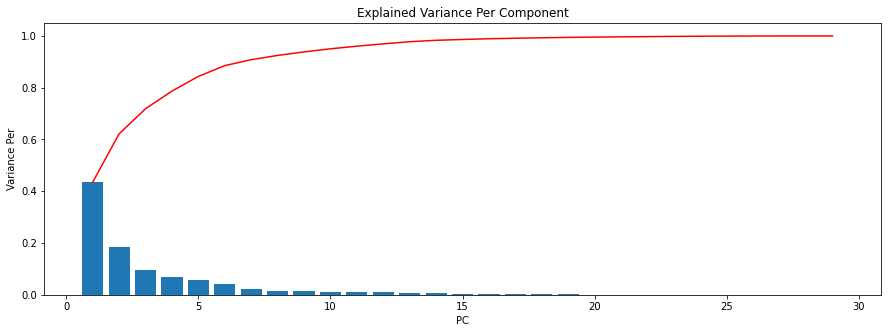

In [150]:
plt.figure(figsize=(15,5))
ax = plt.subplot(111)

ax.bar(bar_loc, variance)
ax.plot(bar_loc, cum_vals, color='r')

ax.set_xlabel('PC')
ax.set_ylabel('Variance Per')
plt.title('Explained Variance Per Component')

plt.show()

In [151]:
kmeans = KMeans(n_clusters=2)

In [152]:
k_fit = kmeans.fit(ind_vars_vals)

In [153]:
labels = kmeans.labels_

In [154]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [155]:
len(df['perimeter_mean'])

569

In [156]:
df_pca.head()


PC 1      PC 2      PC 3  ...     PC 27     PC 28     PC 29
0  9.203452  1.467105 -1.126754  ... -0.266324 -0.032794  0.062891
1  1.914355 -3.660060 -0.533904  ...  0.169129  0.032817 -0.003336
2  5.475461 -1.243030 -0.556447  ...  0.053376  0.045916  0.002771
3  7.832628  9.726986 -3.215607  ...  0.137250  0.049544 -0.048677
4  3.548678 -1.911151  1.391602  ...  0.033722 -0.036326 -0.006315

[5 rows x 29 columns]

In [157]:
df_pca[('PC 1')]

0       9.203452
1       1.914355
2       5.475461
3       7.832628
4       3.548678
         ...    
564     5.992498
565     3.386224
566     1.062735
567    10.247870
568    -5.218996
Name: PC 1, Length: 569, dtype: float64

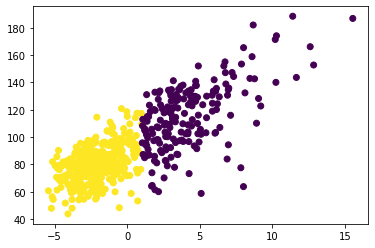

In [158]:
plt.scatter(x=df_pca['PC 1'], y=df['perimeter_mean'], c=labels)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project